In [3]:
import graphviz
from IPython.display import display
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Original Circuit

In [2]:
def read_output_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        
    vector = list(map(int, re.findall(r"Input vector: (.+)", content)[0].split()))
    performance = float(re.findall(r"Performance: ([\d\.]+)", content)[0])
    recovery = float(re.findall(r"Recovery: ([\d\.]+)", content)[0])
    grade = float(re.findall(r"Grade: ([\d\.]+)", content)[0])
    
    if len(vector) % 3 != 1:
        raise ValueError("The input vector length must be of the form 3n + 1.")
    
    return vector, performance, recovery, grade

def create_graph(vector, performance, recovery, grade):
    # Calculate the number of nodes
    n = len(vector) // 3 - 1

    # Create a new Digraph
    dot = graphviz.Digraph()

    # Set the graph to left to right layout
    dot.attr(rankdir='LR')

    # Define node names and properties
    node_names = {0: 'Unit 0'}
    for i in range(1, n + 1):
        node_names[i] = f'Unit {i}'
    node_names[n + 1] = 'Concentrate'
    node_names[n + 2] = 'Tailings'

    # Add nodes to the graph with square shape
    for node, name in node_names.items():
        dot.node(str(node), name, shape='rectangle')

    # Add the feed node and connect it to the node at index 0 of the vector
    dot.node('feed', 'Feed', shape='rectangle')
    dot.edge('feed', f'{vector[0]}:w', color='black')

    # Define edge colors and port positions
    edge_colors = ['blue', 'purple', 'red']
    edge_ports = ['n', 'e', 's']  # north (top), east (middle/front), south (bottom)

    # Add edges to the graph
    for i in range(n + 1):  # includes 'Concentrate' and 'Tailings'
        edges = [(i, vector[3*i + 1]), (i, vector[3*i + 2]), (i, vector[3*i + 3])]
        for j, (source, target) in enumerate(edges):
            color = edge_colors[j % 3]
            source_port = edge_ports[j % 3]
            dot.edge(f'{source}:{source_port}', f'{target}:w', color=color)

    # Add performance, recovery, and grade as labels
    label_text = f"Vector: {vector}\nPerformance: {performance}\nRecovery: {recovery}\nGrade: {grade}"
    dot.attr(label=label_text, fontsize='20', labelloc='b')

    # Render and display the graph
    dot.render('./circuit_diagram/original_circuit', format='pdf')
    dot.view()

    # Optionally, display the graph inline (e.g., in a Jupyter Notebook)
    display(dot)

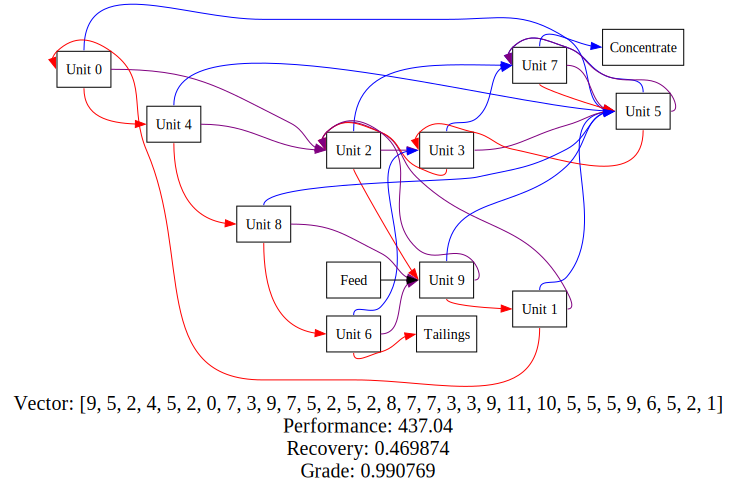

In [3]:
# Example usage
file_path = 'output.txt'
vector, performance, recovery, grade = read_output_file(file_path)

create_graph(vector, performance, recovery, grade)


# Modified Circuit.

In [4]:
import re
import graphviz
from IPython.display import display

def read_output_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        
    vector = list(map(int, re.findall(r"Input vector: (.+)", content)[0].split()))
    performance = float(re.findall(r"Performance: ([\d\.]+)", content)[0])
    recovery = float(re.findall(r"Recovery: ([\d\.]+)", content)[0])
    grade = float(re.findall(r"Grade: ([\d\.]+)", content)[0])
    
    if len(vector) % 3 != 1:
        raise ValueError("The input vector length must be of the form 3n + 1.")
    
    return vector, performance, recovery, grade

def create_graph(vector, performance, recovery, grade):
    # Calculate the number of nodes
    n = len(vector) // 3 - 1

    # Create a new Digraph
    dot = graphviz.Digraph()

    # Set the graph to left to right layout with optimized spacing
    dot.attr(rankdir='LR', nodesep='0.5', ranksep='1')

    # Define node names and properties
    node_names = {0: 'Unit 0'}
    for i in range(1, n + 1):
        node_names[i] = f'Unit {i}'
    node_names[n + 1] = 'Concentrate'
    node_names[n + 2] = 'Tailings'

    # Add subgraph for the leftmost rank (feed node)
    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('feed', 'Feed', shape='box', style='filled', color='lightyellow', fontsize='12', fontname='Arial', width='1.5', height='1')
    
    # Add subgraph for the rightmost rank (concentrate and tailings nodes)
    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node(str(n + 1), 'Concentrate', shape='box', style='filled', color='lightgreen', fontsize='12', fontname='Arial', width='1.5', height='1')
        s.node(str(n + 2), 'Tailings', shape='box', style='filled', color='lightgrey', fontsize='12', fontname='Arial', width='1.5', height='1')

    # Add other nodes to the graph with square shape and styling
    for node, name in node_names.items():
        if name not in ['Concentrate', 'Tailings']:
            dot.node(str(node), name, shape='box', style='filled', color='lightblue', fontsize='12', fontname='Arial', width='1.5', height='1')

    # Connect the feed node to the first node in the vector
    dot.edge('feed', f'{vector[0]}:w', color='black', penwidth='1.5')

    # Define edge colors and port positions
    edge_colors = ['blue', 'purple', 'red']
    edge_ports = ['n', 'e', 's']  # north (top), east (middle/front), south (bottom)

    # Add edges to the graph
    for i in range(n + 1):  # includes 'Concentrate' and 'Tailings'
        edges = [(i, vector[3*i + 1]), (i, vector[3*i + 2]), (i, vector[3*i + 3])]
        for j, (source, target) in enumerate(edges):
            color = edge_colors[j % 3]
            source_port = edge_ports[j % 3]
            dot.edge(f'{source}:{source_port}', f'{target}:w', color=color, penwidth='1.5')

    # Add performance, recovery, and grade as labels
    label_text = f"Vector: {vector}\nPerformance: {performance}\nRecovery: {recovery}\nGrade: {grade}"
    dot.attr(label=label_text, fontsize='24', labelloc='b', fontname='Arial', margin='0.5')

    # Render and display the graph
    dot.render('./circuit_diagram/updated_circuit', format='pdf')
    dot.view()

    # Display the graph inline (e.g., in a Jupyter Notebook)
    display(dot)



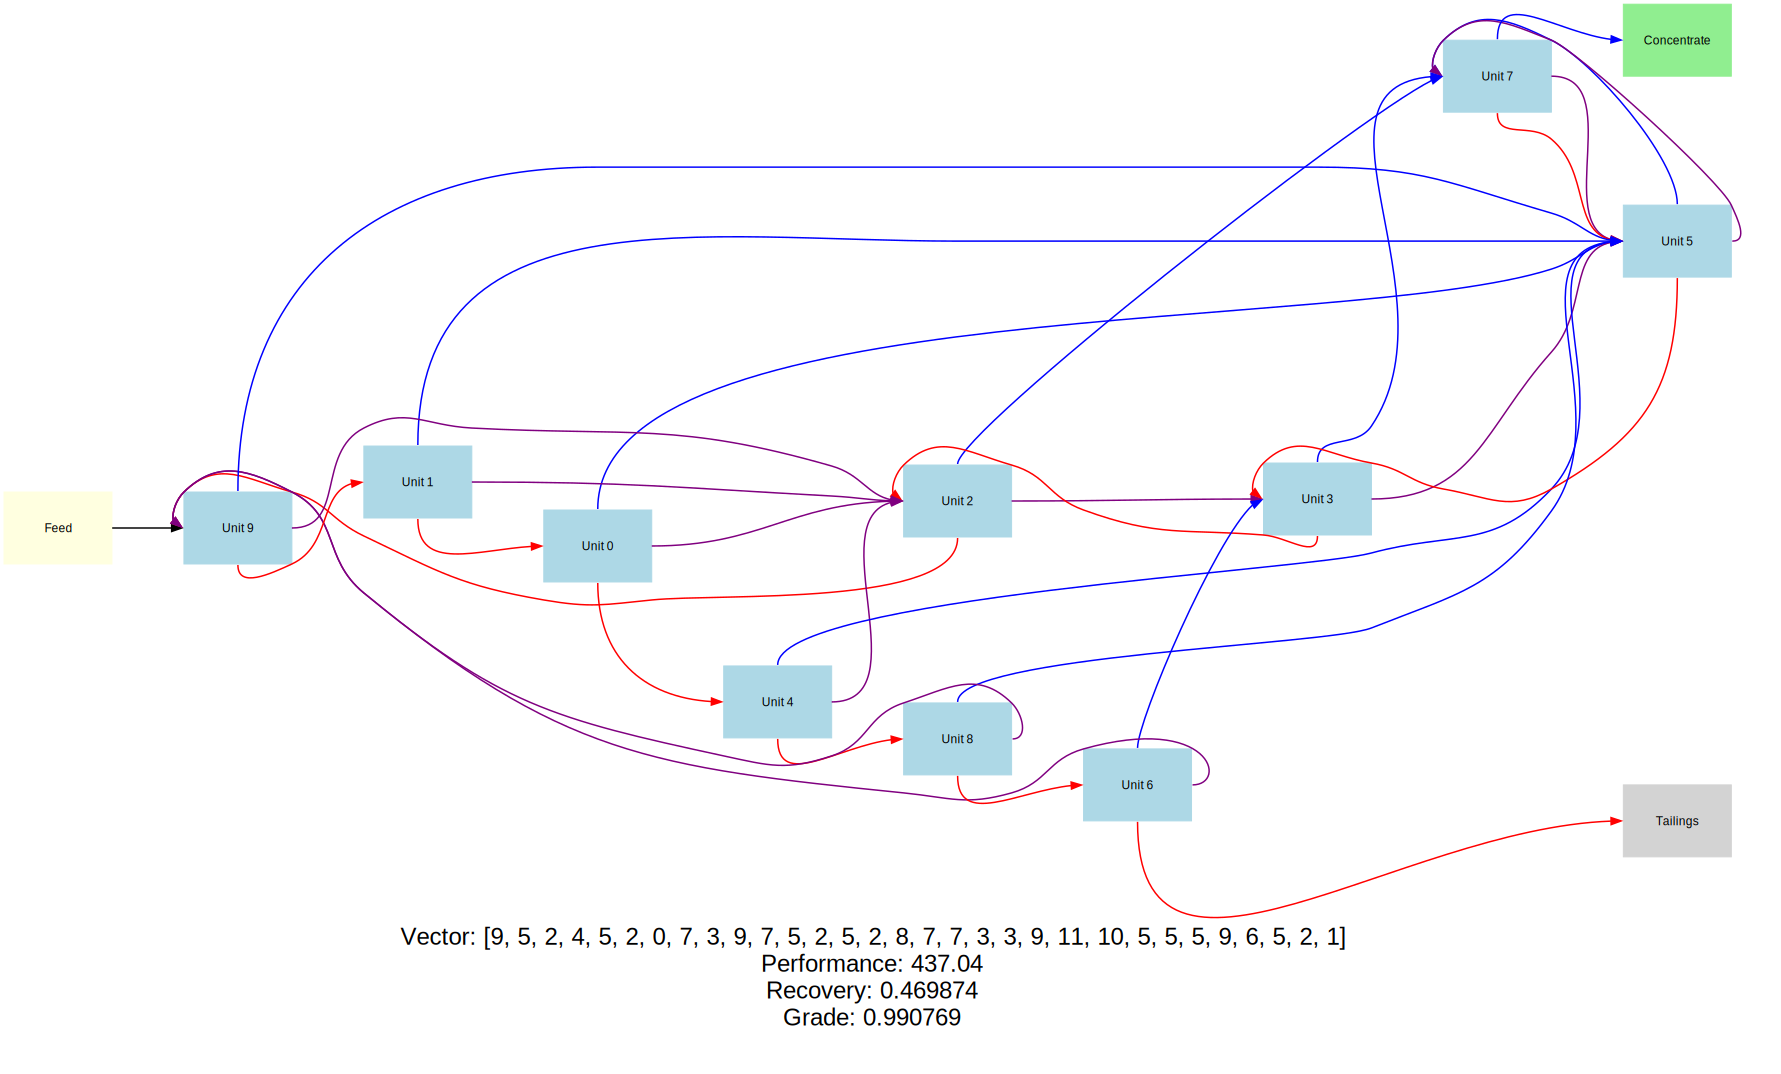

In [5]:
# Example usage
file_path = 'output.txt'
# vector, performance, recovery, grade = read_output_file(file_path)
vector1 = [2,4,7,1,4,7,5,4,7,0,10,4,4,3,3,6,4,7,9,3,4,7,3,6,2,4,2,11,4,7,8]
create_graph(vector, 0, 0, 0)

# Generate Genetic Population Plot

In [13]:

def load_csv_files(data_folder, file_prefix):
    """Load CSV files from the data folder and return a dictionary of dataframes."""
    if (file_prefix is None) or (data_folder is None):
        print("Please provide a valid file prefix and data folder.")
        return None

    if (file_prefix == "Population"):
        csv_files = [file for file in os.listdir(data_folder) if file.startswith('genetic_population_size_') and file.endswith('.csv')]
    elif (file_prefix == "Mutation"):
        csv_files = [file for file in os.listdir(data_folder) if file.startswith('genetic_mutation_rate_') and file.endswith('.csv')]
    elif (file_prefix == "Crossover"):
        csv_files = [file for file in os.listdir(data_folder) if file.startswith('genetic_cross_probability_') and file.endswith('.csv')]
    elif (file_prefix == "Stall"):
        csv_files = [file for file in os.listdir(data_folder) if file.startswith('genetic_stall_length_') and file.endswith('.csv')]
    elif (file_prefix == "Stall_Mutation"):
        csv_files = [file for file in os.listdir(data_folder) if file.startswith('genetic_stall_mutation_rate_') and file.endswith('.csv')]
    elif (file_prefix == "Stall_Crossover"):
        csv_files = [file for file in os.listdir(data_folder) if file.startswith('genetic_stall_cross_probability_') and file.endswith('.csv')]
    elif (file_prefix == "Crossover_Type"):
        csv_files = [file for file in os.listdir(data_folder) if file.startswith('genetic_cross_type_') and file.endswith('.csv')]
    
    # Check if any files are found
    if not (csv_files):
        print(f"Missing CSV files found in the directory: {data_folder}")
        return None
    
    dataframes = {}
    for file in csv_files:
        size = file.split('_')[-1].replace('.csv', '')
        df = pd.read_csv(os.path.join(data_folder, file))
        
        # Debugging: Print column names to check for issues
        print(f"Columns in {file}: {df.columns.tolist()}")
        
        # Clean column names
        df.columns = df.columns.str.strip()
        
        dataframes[size] = df
    
    
    return dataframes

def plot_genetic_graphs(dataframes, file_prefix):
    """Plot overlapping graphs for different population sizes."""
    if not dataframes:
        print("No dataframes to plot.")
        return
    
    plt.figure(figsize=(12, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(dataframes)))

    for (size, df), color in zip(dataframes.items(), colors):
        plt.plot(df['Generation'], df['Best Value'], label=f'{file_prefix} {size}', color=color)

    plt.title('Genetic Algorithm - Best Value Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best Value')
    plt.legend()
    plt.grid(True)
    plt.show()

Columns in genetic_population_size_500.csv: ['Generation', 'Best Value']
Columns in genetic_population_size_1000.csv: ['Generation', 'Best Value']
Columns in genetic_population_size_5000.csv: ['Generation', 'Best Value']
Columns in genetic_population_size_200.csv: ['Generation', 'Best Value']


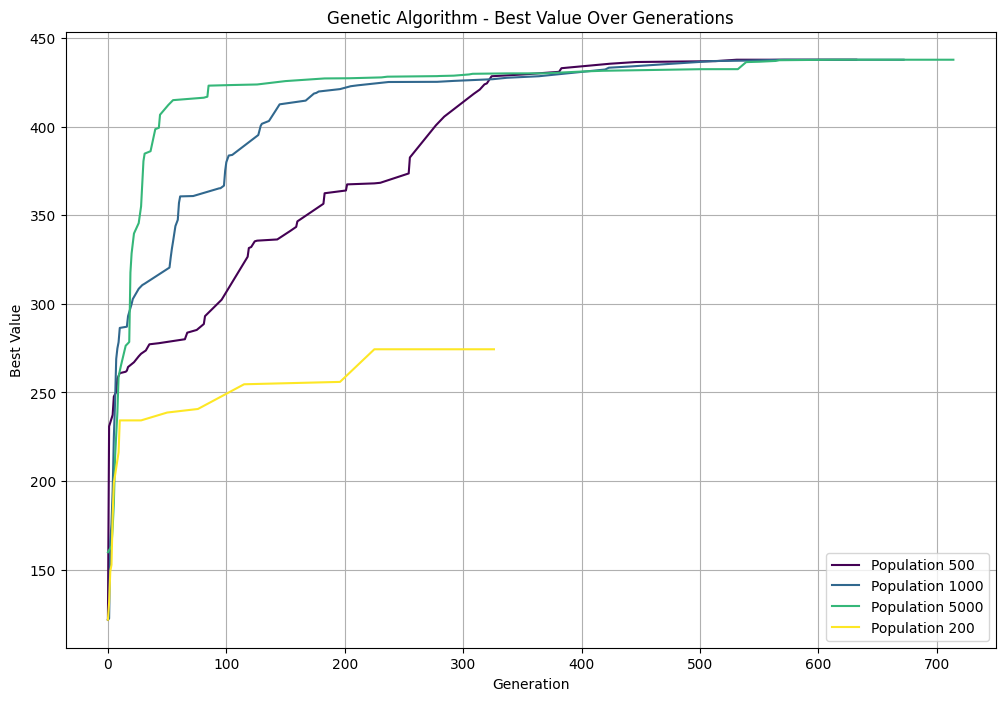

Columns in genetic_mutation_rate_0.01.csv: ['Generation', 'Best Value']
Columns in genetic_mutation_rate_0.005.csv: ['Generation', 'Best Value']
Columns in genetic_mutation_rate_0.015.csv: ['Generation', 'Best Value']
Columns in genetic_mutation_rate_0.04.csv: ['Generation', 'Best Value']
Columns in genetic_mutation_rate_0.02.csv: ['Generation', 'Best Value']


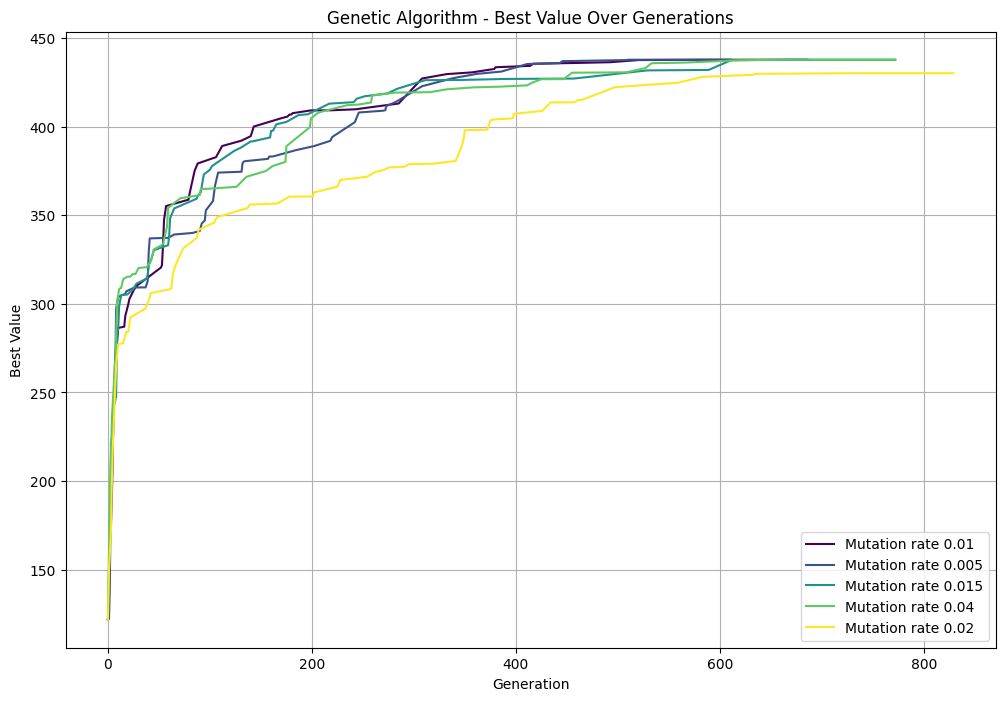

Columns in genetic_cross_probability_0.75.csv: ['Generation', 'Best Value']
Columns in genetic_cross_probability_0.7.csv: ['Generation', 'Best Value']
Columns in genetic_cross_probability_0.8.csv: ['Generation', 'Best Value']
Columns in genetic_cross_probability_0.85.csv: ['Generation', 'Best Value']
Columns in genetic_cross_probability_0.9.csv: ['Generation', 'Best Value']
Columns in genetic_cross_probability_1.0.csv: ['Generation', 'Best Value']
Columns in genetic_cross_probability_0.95.csv: ['Generation', 'Best Value']


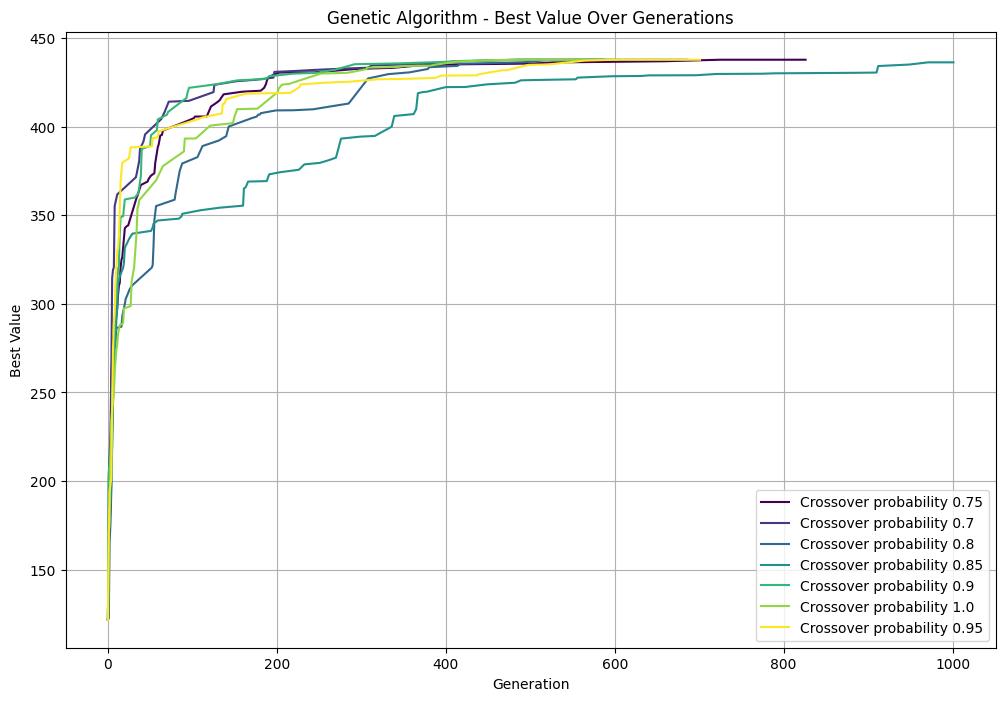

Columns in genetic_stall_length_25.csv: ['Generation', 'Best Value']
Columns in genetic_stall_length_20.csv: ['Generation', 'Best Value']
Columns in genetic_stall_length_10.csv: ['Generation', 'Best Value']
Columns in genetic_stall_length_40.csv: ['Generation', 'Best Value']


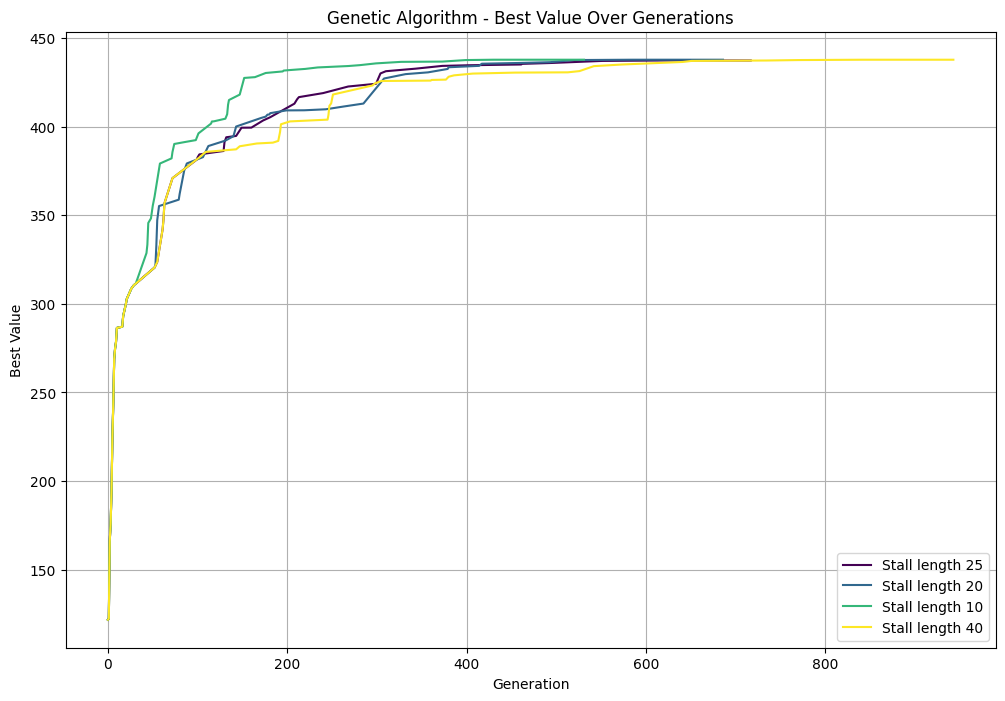

Columns in genetic_stall_mutation_rate_0.9.csv: ['Generation', 'Best Value']
Columns in genetic_stall_mutation_rate_0.6.csv: ['Generation', 'Best Value']
Columns in genetic_stall_mutation_rate_1.0.csv: ['Generation', 'Best Value']
Columns in genetic_stall_mutation_rate_0.3.csv: ['Generation', 'Best Value']
Columns in genetic_stall_mutation_rate_0.8.csv: ['Generation', 'Best Value']
Columns in genetic_stall_mutation_rate_0.4.csv: ['Generation', 'Best Value']
Columns in genetic_stall_mutation_rate_0.2.csv: ['Generation', 'Best Value']
Columns in genetic_stall_mutation_rate_0.1.csv: ['Generation', 'Best Value']
Columns in genetic_stall_mutation_rate_0.7.csv: ['Generation', 'Best Value']
Columns in genetic_stall_mutation_rate_0.5.csv: ['Generation', 'Best Value']


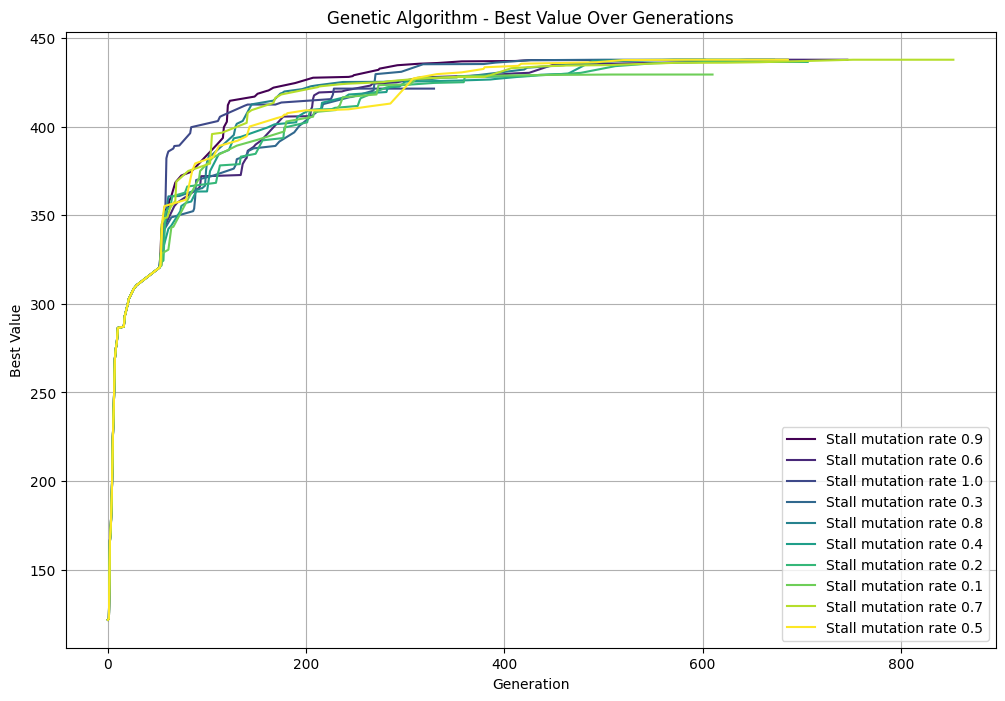

Columns in genetic_stall_cross_probability_0.2.csv: ['Generation', 'Best Value']
Columns in genetic_stall_cross_probability_0.0.csv: ['Generation', 'Best Value']
Columns in genetic_stall_cross_probability_0.4.csv: ['Generation', 'Best Value']
Columns in genetic_stall_cross_probability_0.3.csv: ['Generation', 'Best Value']
Columns in genetic_stall_cross_probability_0.05.csv: ['Generation', 'Best Value']
Columns in genetic_stall_cross_probability_0.1.csv: ['Generation', 'Best Value']
Columns in genetic_stall_cross_probability_0.15.csv: ['Generation', 'Best Value']


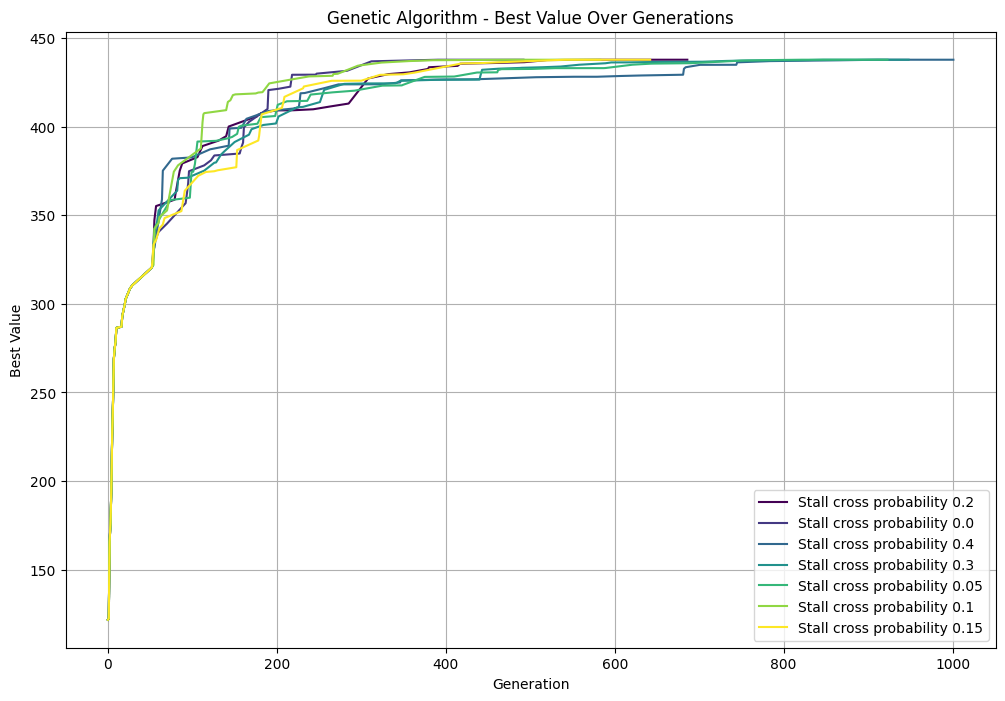

Columns in genetic_cross_type_multipoint.csv: ['Generation', 'Best Value']
Columns in genetic_cross_type_one-point.csv: ['Generation', 'Best Value']
Columns in genetic_cross_type_two-point.csv: ['Generation', 'Best Value']
Columns in genetic_cross_type_random.csv: ['Generation', 'Best Value']


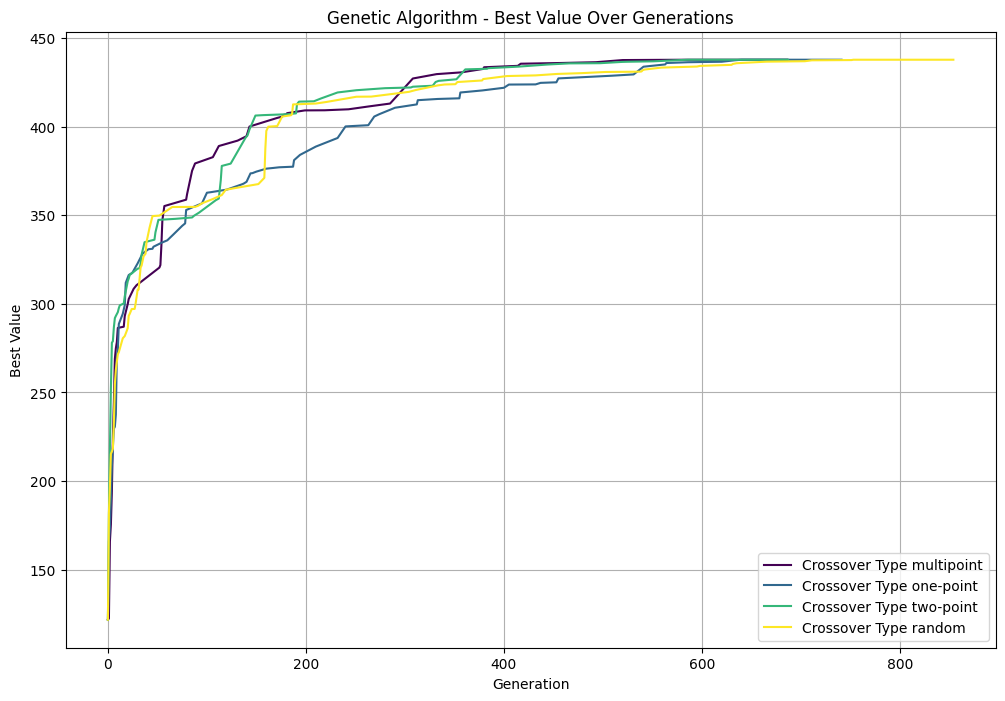

In [14]:
# Load the CSV files
data_folder = './data'  # Specify your data folder path here

# Population plotting
dataframes = load_csv_files(data_folder, "Population")
# Plot the graphs
plot_genetic_graphs(dataframes, "Population")

# Mutation Rate plotting
dataframes = load_csv_files(data_folder, "Mutation")
# Plot the graphs
plot_genetic_graphs(dataframes, "Mutation rate")

# Crossover Rate plotting
dataframes = load_csv_files(data_folder, "Crossover")
# Plot the graphs
plot_genetic_graphs(dataframes, "Crossover probability")

# Stall length plotting
dataframes = load_csv_files(data_folder, "Stall")
# Plot the graphs
plot_genetic_graphs(dataframes, "Stall length")

# Stall Mutation Rate plotting
dataframes = load_csv_files(data_folder, "Stall_Mutation")
# Plot the graphs
plot_genetic_graphs(dataframes, "Stall mutation rate")

# Stall Crossover Rate plotting
dataframes = load_csv_files(data_folder, "Stall_Crossover")
# Plot the graphs
plot_genetic_graphs(dataframes, "Stall cross probability")

# Crossover Type plotting
dataframes = load_csv_files(data_folder, "Crossover_Type")
# Plot the graphs
plot_genetic_graphs(dataframes, "Crossover Type")

# Create Circuit Animations

In [31]:
import re
import graphviz
from IPython.display import display, IPImage
import imageio.v2 as imageio
import os
from PIL import Image

def read_output_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        
    vector = list(map(int, re.findall(r"Input vector: (.+)", content)[0].split()))
    performance = float(re.findall(r"Performance: ([\d\.]+)", content)[0])
    recovery = float(re.findall(r"Recovery: ([\d\.]+)", content)[0])
    grade = float(re.findall(r"Grade: ([\d\.]+)", content)[0])
    
    if len(vector) % 3 != 1:
        raise ValueError("The input vector length must be of the form 3n + 1.")
    
    return vector, performance, recovery, grade

def create_graph(vector, performance, recovery, grade, edges, highlight_edge=None, highlight_node=None, show_labels=False):
    # Calculate the number of nodes
    n = len(vector) // 3 - 1

    # Create a new Digraph
    dot = graphviz.Digraph()

    # Set the graph to left to right layout with optimized spacing
    dot.attr(rankdir='LR', nodesep='0.5', ranksep='1')

    # Define node names and properties
    node_names = {0: 'Unit 0'}
    for i in range(1, n + 1):
        node_names[i] = f'Unit {i}'
    node_names[n + 1] = 'Concentrate'
    node_names[n + 2] = 'Tailings'

    # Add subgraph for the leftmost rank (feed node)
    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('feed', 'Feed', shape='box', style='filled', color='yellow', fontsize='24', fontname='Arial', width='2', height='1.5')
    
    # Add nodes and edges based on the current step
    added_nodes = set()
    for edge in edges:
        source, target, color, port = edge
        if source not in added_nodes:
            source_color = 'green' if source == highlight_node else 'lightblue'
            if source in node_names:
                dot.node(str(source), node_names[source], shape='box', style='filled', color=source_color, fontsize='24', fontname='Arial', width='1.5', height='1.2')
            added_nodes.add(source)
        if target not in added_nodes:
            if target == n + 1:
                target_color = 'lightgreen'  # Concentrate
            elif target == n + 2:
                target_color = 'lightgrey'  # Tailings
            else:
                target_color = 'green' if target == highlight_node else 'lightblue'
            if target in node_names:
                dot.node(str(target), node_names[target], shape='box', style='filled', color=target_color, fontsize='24', fontname='Arial', width='1.5', height='1.2')
            else:
                # For intermediate nodes not in node_names
                dot.node(str(target), shape='box', style='filled', color=target_color, fontsize='24', fontname='Arial', width='1.5', height='1.2')
            added_nodes.add(target)
        edge_color = 'green' if edge == highlight_edge else color
        penwidth = '2' if edge != highlight_edge else '5'
        dot.edge(f'{source}:{port}', f'{target}:w', color=edge_color, penwidth=penwidth, style='solid')

    # Add performance, recovery, and grade as labels in the last frame
    if show_labels:
        label_text = f"Vector: {vector}\nPerformance: {performance}\nRecovery: {recovery}\nGrade: {grade}"
        dot.attr(label=label_text, fontsize='40', labelloc='b', fontname='Arial', margin='0.5')

    return dot

def create_animation(vector, performance, recovery, grade, output_dir):
    steps_dir = os.path.join(output_dir, 'steps')
    if not os.path.exists(steps_dir):
        os.makedirs(steps_dir)

    images = []
    steps = len(vector) // 3 * 3  # Total steps needed for the animation

    # Initial setup: first edge from feed
    edges = []
    edges.append(('feed', f'{vector[0]}', 'black', 'w'))

    visited = set()
    to_process = [vector[0]]
    edge_colors = ['blue', 'purple', 'red']
    edge_ports = ['n', 'e', 's']

    while to_process:
        node = to_process.pop(0)
        if node in visited or node >= len(vector) // 3:
            continue
        visited.add(node)
        for i in range(3):
            target = vector[3*node + 1 + i]
            if target >= len(vector) // 3 + 2:  # Skip invalid targets
                continue
            color = edge_colors[i % 3]
            port = edge_ports[i % 3]
            edges.append((node, target, color, port))
            if target not in visited and target < len(vector) // 3:
                to_process.append(target)

    for step in range(len(edges) + 1):
        show_labels = (step == len(edges))  # Show labels only in the last frame
        current_edges = edges[:step]
        highlight_edge = edges[step - 1] if step > 0 else None
        highlight_node = highlight_edge[1] if highlight_edge else None
        dot = create_graph(vector, performance, recovery, grade, current_edges, highlight_edge, highlight_node, show_labels)
        file_path = os.path.join(steps_dir, f"step_{step}.png")
        dot.render(file_path, format='png')
        images.append(Image.open(f"{file_path}.png").convert("RGBA"))
    
    # Ensure all images have the same shape
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    max_height = max(heights)

    resized_images = []
    for img in images:
        new_img = Image.new("RGBA", (max_width, max_height), "white")
        new_img.paste(img, (0, 0), img)
        resized_images.append(new_img)

    # Create the animation
    gif_path = os.path.join(output_dir, "circuit_animation.gif")
    durations = [2000] * len(edges) + [15000]  # long wait at the end
    resized_images[0].save(gif_path, save_all=True, append_images=resized_images[1:], duration=durations, loop=0, disposal=2)
    return gif_path


In [32]:
# Example usage
file_path = 'output.txt'
output_dir = './animations'
vector, performance, recovery, grade = read_output_file(file_path)
gif_path = create_animation(vector, performance, recovery, grade, output_dir)
print(f"Animation saved to {gif_path}")


Animation saved to ./animations/circuit_animation.gif


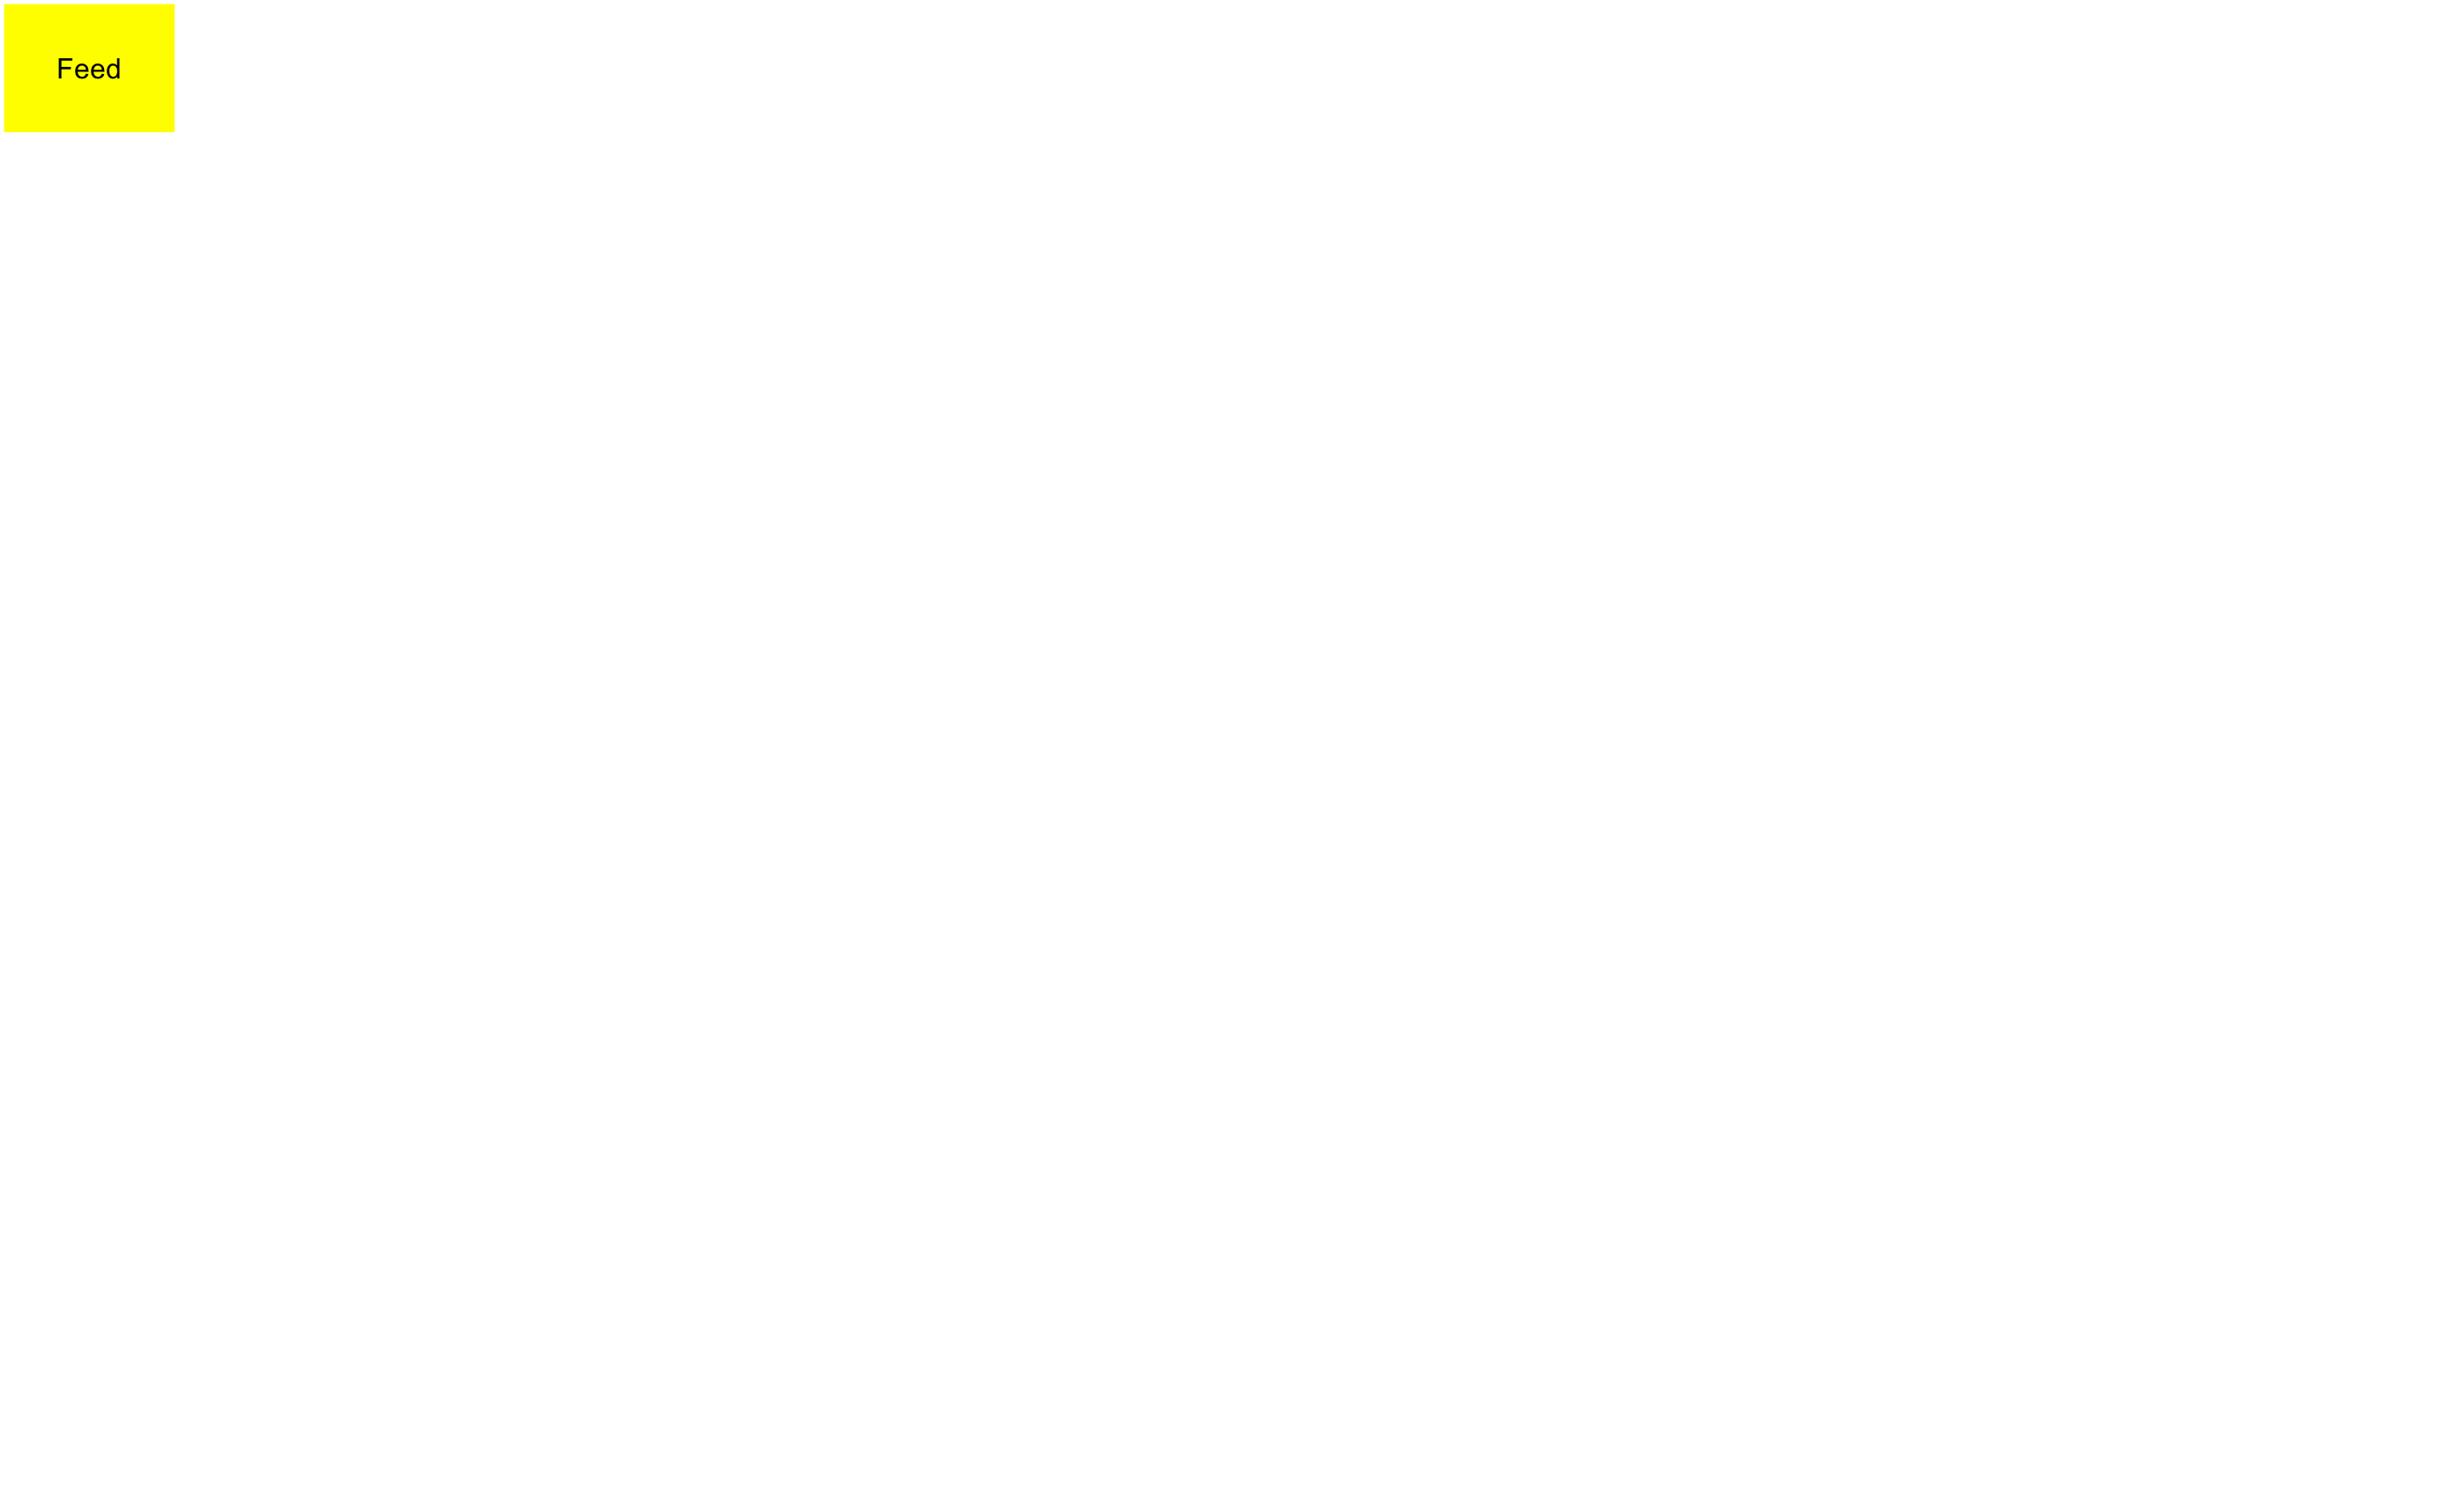

In [35]:
from IPython.display import display, Image as IPImage
# Display the GIF
display(IPImage(filename=gif_path))